In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
import tensorflow as tf

In [2]:
from tensorflow.keras.models import Sequential # is used to build a sequential NN
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten, GRU
from tensorflow.keras.layers import Conv1D, TimeDistributed
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import Adam

In [3]:
from sklearn.model_selection import train_test_split # to automatically split the dataset into trining and testing sets
from tensorflow.keras.utils import to_categorical # to convert data to one hot encoded data

In [1]:
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt 
from keras_tuner.tuners import BayesianOptimization
from keras_tuner.engine.hyperparameters import HyperParameters

#Data for Signer Dependent mode 

In [5]:
#path for exported data, numpy arrays
DATA_PATH = os.path.join('EthSL_Dataset')
actions = np.array(['ሀዘን','ህመም','ለምን', 'ልምምድ', 'መራራ', 'መናደድ', 'መጀመር', 'መገረም', 
                    'መጥፎ', 'መጨረስ', 'መጨነቅ', 'ማሸነፍ', 'ምስጋና', 'ቀላል', 'ተነስ', 'አስቸጋሪ', 
                    'እህት', 'ወንድም', 'ይቅርታ', 'ጎበዝ'])

no_sequences = 280 #number of videos to be captured is set to 280
sequence_length = 30 #number of frames in each video is set to 30

In [6]:
label_map = {label:num for num, label in enumerate(actions)}

In [7]:
# build big array which contains all data
sequences, labels = [], [] # feature and label data respectively
for action in actions:
    for sequence in range(no_sequences):
        window = [] # represents all frames in a specific video
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window) # all data for each word is appended and a single numpy array is created
        labels.append(label_map[action])

In [8]:
x = np.array(sequences)

In [9]:
y = to_categorical(labels).astype(int)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [12]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5040, 30, 1662), (560, 30, 1662), (5040, 20), (560, 20))

#Data for Signer Independent mode

#Load training data

In [5]:
#path for exported data, numpy arrays to load training data
DATA_PATH_train = os.path.join('EthSL_Train')
actions_train = np.array(['ሀዘን','ህመም','ለምን', 'ልምምድ', 'መራራ', 'መናደድ', 'መጀመር', 'መገረም', 
                    'መጥፎ', 'መጨረስ', 'መጨነቅ', 'ማሸነፍ', 'ምስጋና', 'ቀላል', 'ተነስ', 'አስቸጋሪ', 
                    'እህት', 'ወንድም', 'ይቅርታ', 'ጎበዝ'])

no_sequences_train = 240 #number of videos to be captured is set to 40
sequence_length_train = 30 #number of frames in each video is set to 30

In [6]:
label_map_train = {label:num for num, label in enumerate(actions_train)}

In [7]:
# build big array which contains all training data
sequences_train, labels_train = [], [] # feature and label data respectively
for action_train in actions_train:
    for sequence_train in range(no_sequences_train):
        window_train = [] # represents all frames in a specific video
        for frame_num_train in range(sequence_length_train):
            res_train = np.load(os.path.join(DATA_PATH_train, action_train, str(sequence_train), "{}.npy".format(frame_num_train)))
            window_train.append(res_train)
        sequences_train.append(window_train) # all data for each word is appended and a single numpy array is created
        labels_train.append(label_map_train[action_train])

In [8]:
x_training = np.array(sequences_train)

In [9]:
y_training = to_categorical(labels_train).astype(int)

In [10]:
x_train, x_val, y_train, y_val = train_test_split(x_training, y_training, test_size=0.2)

In [11]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((3840, 30, 1662), (960, 30, 1662), (3840, 20), (960, 20))

#Load test data

In [56]:
#path for exported data, numpy arrays to load test data
DATA_PATH_test = os.path.join('EthSL_Test')
actions_test = np.array(['ሀዘን','ህመም','ለምን', 'ልምምድ', 'መራራ', 'መናደድ', 'መጀመር', 'መገረም', 
                    'መጥፎ', 'መጨረስ', 'መጨነቅ', 'ማሸነፍ', 'ምስጋና', 'ቀላል', 'ተነስ', 'አስቸጋሪ', 
                    'እህት', 'ወንድም', 'ይቅርታ', 'ጎበዝ'])

no_sequences_test = 40 #number of videos to be captured is set to 40
sequence_length_test = 30 #number of frames in each video is set to 30

In [57]:
label_map_test = {label:num for num, label in enumerate(actions_test)}

In [58]:
# build big array which contains all testing data
sequences_test, labels_test = [], [] # feature and label data respectively
for action_test in actions_test:
    for sequence_test in range(no_sequences_test):
        window_test = [] # represents all frames in a specific video
        for frame_num_test in range(sequence_length_test):
            res_test = np.load(os.path.join(DATA_PATH_test, action_test, str(sequence_test), "{}.npy".format(frame_num_test)))
            window_test.append(res_test)
        sequences_test.append(window_test) # all data for each word is appended and a single numpy array is created
        labels_test.append(label_map_test[action_test])

In [59]:
x_testing = np.array(sequences_test)

In [60]:
y_testing = to_categorical(labels_test).astype(int)

In [76]:
#To split some of the data and take the larger portion for testing
x_trainT, x_test, y_trainT, y_test = train_test_split(x_testing, y_testing, test_size=0.95)

In [77]:
x_trainT.shape, x_test.shape, y_trainT.shape, y_test.shape

((40, 30, 1662), (760, 30, 1662), (40, 20), (760, 20))

In [2]:
#A  model for GRU
def build_model(hp):
    model = Sequential()
    model.add(GRU(hp.Int('first_lstm_units', min_value=32, max_value=512, step=32), 
                   return_sequences = True, input_shape=(30,1662), activation = 'tanh'))
    
    for i in range(hp.Int('n_lstm_layers', 1, 8)):
        model.add(GRU(hp.Int(f'lstm_{i}_units',min_value=32,max_value=512,step=32), 
                       recurrent_activation='sigmoid', return_sequences=True, activation = 'tanh'))
        
    model.add(Dropout(hp.Float('Dropout_rate1',min_value=0,max_value=0.5,step=0.1)))
    model.add(GRU(hp.Int('last_layer_neurons',min_value=32,max_value=512,step=32), 
                   recurrent_activation='sigmoid'))
    
    #model.add(Dropout(hp.Float('Dropout_rate',min_value=0,max_value=0.5,step=0.1)))
    
    model.add(Dense(units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
                    activation='relu'))  
    #model.add(Dropout(hp.Float('Dropout_rate2',min_value=0,max_value=0.5,step=0.1)))
    model.add(Dense(20, activation='softmax'))
    
    #compilation of model
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-3, 1e-4, 1e-5, 1e-6])),
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])
    return model

In [14]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor= 'val_categorical_accuracy', patience = 5)

In [3]:
#A tuner for GRU
tunerBiLSTM = BayesianOptimization(
        build_model,
        objective = 'val_categorical_accuracy',
        #overwrite = True,
        max_trials = 10,
        alpha = 0.0001,
        beta = 2.6,
        max_retries_per_trial = 1,
        max_consecutive_failed_trials = 3,
        directory = 'tuneGRU',
        project_name="GRUTuner"
        )

INFO:tensorflow:Reloading Tuner from tuneGRU\GRUTuner\tuner0.json


In [16]:
tunerBiLSTM.search(
        x_train,
        y_train,
        epochs = 70,
        batch_size = 16,
        validation_data = (x_test, y_test),
        callbacks = [stop_early]
        )

Trial 10 Complete [02h 07m 05s]
val_categorical_accuracy: 0.15535713732242584

Best val_categorical_accuracy So Far: 0.9312499761581421
Total elapsed time: 1d 01h 00m 45s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [4]:
tunerBiLSTM.reload()

In [23]:
best_hps = tunerBiLSTM.get_best_hyperparameters(num_trials = 1)[0]

In [5]:
tunerBiLSTM.results_summary()

Results summary
Results in tuneGRU\GRUTuner
Showing 10 best trials
Trial summary
Hyperparameters:
first_lstm_units: 256
n_lstm_layers: 7
lstm_0_units: 448
Dropout_rate1: 0.30000000000000004
last_layer_neurons: 64
dense_1_units: 80
learning_rate: 0.0001
lstm_1_units: 224
lstm_2_units: 224
lstm_3_units: 320
lstm_4_units: 256
lstm_5_units: 128
lstm_6_units: 64
Score: 0.9312499761581421
Trial summary
Hyperparameters:
first_lstm_units: 128
n_lstm_layers: 1
lstm_0_units: 288
Dropout_rate1: 0.30000000000000004
last_layer_neurons: 224
dense_1_units: 96
learning_rate: 0.0001
lstm_1_units: 192
lstm_2_units: 128
lstm_3_units: 448
lstm_4_units: 288
lstm_5_units: 384
lstm_6_units: 128
Score: 0.9258928298950195
Trial summary
Hyperparameters:
first_lstm_units: 448
n_lstm_layers: 2
lstm_0_units: 320
Dropout_rate1: 0.2
last_layer_neurons: 256
dense_1_units: 80
learning_rate: 0.0001
lstm_1_units: 352
lstm_2_units: 384
lstm_3_units: 224
Score: 0.9178571701049805
Trial summary
Hyperparameters:
first_lstm_

In [25]:
#tunerCNNLSTM should be changed while doing for ConvLSTM
model = tunerBiLSTM.hypermodel.build(best_hps)

#The name of the model should be changed to ConvLSTMEthSLR
GRU_EthSLR = model.fit(x_train, y_train, epochs = 50, batch_size = 16, validation_data = (x_val, y_val))

Epoch 1/50
240/240 [==============================] - 272s 813ms/step - loss: 2.9949 - categorical_accuracy: 0.0589 - val_loss: 3.0063 - val_categorical_accuracy: 0.0594
Epoch 2/50
240/240 [==============================] - 175s 731ms/step - loss: 2.9007 - categorical_accuracy: 0.0951 - val_loss: 2.8520 - val_categorical_accuracy: 0.1000
Epoch 3/50
240/240 [==============================] - 176s 733ms/step - loss: 2.8245 - categorical_accuracy: 0.1161 - val_loss: 2.7832 - val_categorical_accuracy: 0.1312
Epoch 4/50
240/240 [==============================] - 176s 732ms/step - loss: 2.7204 - categorical_accuracy: 0.1612 - val_loss: 2.6360 - val_categorical_accuracy: 0.1688
Epoch 5/50
240/240 [==============================] - 176s 732ms/step - loss: 2.5320 - categorical_accuracy: 0.2208 - val_loss: 2.4008 - val_categorical_accuracy: 0.2573
Epoch 6/50
240/240 [==============================] - 175s 730ms/step - loss: 2.3277 - categorical_accuracy: 0.2747 - val_loss: 2.2682 - val_categoric

Epoch 49/50
240/240 [==============================] - 177s 739ms/step - loss: 0.1399 - categorical_accuracy: 0.9560 - val_loss: 0.5037 - val_categorical_accuracy: 0.8750
Epoch 50/50
240/240 [==============================] - 178s 743ms/step - loss: 0.0756 - categorical_accuracy: 0.9786 - val_loss: 0.2399 - val_categorical_accuracy: 0.9365


In [ ]:
started at Seven pm end at Ten pm started at 2:40 pm end at 5:40 started at 6:05

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 30, 256)           1474560   
                                                                 
 gru_1 (GRU)                 (None, 30, 448)           948864    
                                                                 
 gru_2 (GRU)                 (None, 30, 224)           452928    
                                                                 
 gru_3 (GRU)                 (None, 30, 224)           302400    
                                                                 
 gru_4 (GRU)                 (None, 30, 320)           524160    
                                                                 
 gru_5 (GRU)                 (None, 30, 256)           443904    
                                                                 
 gru_6 (GRU)                 (None, 30, 128)           1

In [47]:
import pandas as pd 
pd.DataFrame(GRU_EthSLR.history)

,loss,categorical_accuracy,val_loss,val_categorical_accuracy
0,2.994915,0.058854,3.006305,0.059375
1,2.900720,0.095052,2.852037,0.100000
2,2.824498,0.116146,2.783230,0.131250
3,2.720401,0.161198,2.635974,0.168750
4,2.531960,0.220833,2.400785,0.257292
5,2.327690,0.274740,2.268198,0.276042
6,2.160001,0.315104,2.104480,0.326042
7,1.984472,0.377604,1.983946,0.359375
8,1.840664,0.413542,1.830884,0.388542
9,1.720309,0.469010,1.646799,0.487500


<function matplotlib.pyplot.show(close=None, block=None)>

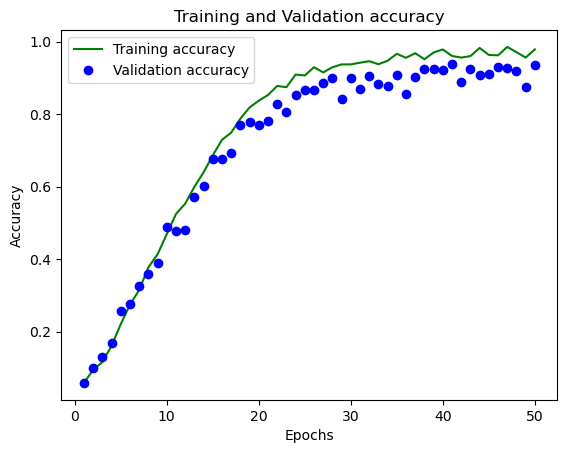

In [42]:
acc = GRU_EthSLR.history['categorical_accuracy']
acc_val = GRU_EthSLR.history['val_categorical_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'bo', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

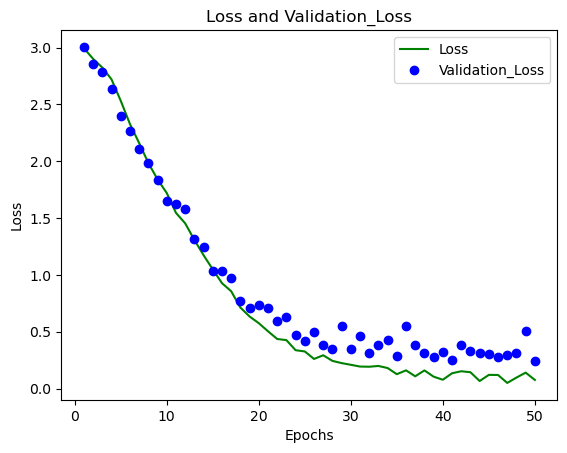

In [43]:
loss1 = GRU_EthSLR.history['loss']
val_loss1 = GRU_EthSLR.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss1, 'g', label='Loss')
plt.plot(epochs, val_loss1, 'bo', label='Validation_Loss')
plt.title('Loss and Validation_Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show

In [78]:
from sklearn import metrics
yhat = model.predict(x_test)

24/24 [==============================] - 11s 432ms/step


In [79]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
multilabel_confusion_matrix(ytrue, yhat)

In [80]:
from sklearn.metrics import classification_report

label_names = ['ሀዘን','ህመም','ለምን', 'ልምምድ', 'መራራ', 'መናደድ', 'መጀመር', 'መገረም', 
                    'መጥፎ', 'መጨረስ', 'መጨነቅ', 'ማሸነፍ', 'ምስጋና', 'ቀላል', 'ተነስ', 'አስቸጋሪ', 
                    'እህት', 'ወንድም', 'ይቅርታ', 'ጎበዝ']

#print(classification_report(ytrue, yhat,target_names=label_names))
print(classification_report(ytrue, yhat, labels=np.arange(0, len(label_names),1), target_names=label_names, zero_division=0))

              precision    recall  f1-score   support

         ሀዘን       0.81      1.00      0.90        35
         ህመም       0.15      0.24      0.18        38
         ለምን       0.31      0.95      0.46        38
        ልምምድ       0.41      0.34      0.37        38
         መራራ       0.83      1.00      0.90        38
        መናደድ       0.25      0.05      0.09        37
        መጀመር       1.00      0.08      0.15        38
        መገረም       0.68      1.00      0.81        38
         መጥፎ       0.50      0.30      0.37        40
        መጨረስ       0.71      0.63      0.67        38
        መጨነቅ       0.29      0.13      0.18        39
        ማሸነፍ       0.31      0.38      0.34        40
        ምስጋና       0.00      0.00      0.00        38
         ቀላል       0.35      0.97      0.51        38
         ተነስ       0.48      0.28      0.35        40
       አስቸጋሪ       0.87      0.71      0.78        38
         እህት       0.43      0.08      0.14        37
        ወንድም       0.45    

In [44]:
from tensorflow.keras.models import save_model
from pickle import dump,load

In [45]:
#save the model with different names
save_model(model,'GRU_Best_candidateIndependent.h5')

In [ ]:
sequence = [] # capture frames
sentence = [] # to concatenate inputs
prediction = []
threshold = 0.5

cap = cv2.VideoCapture(1)

#set mediapipe model detection and tracking confidence
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic: 
    
    # Create loop to collect the words
    for action in actions:
        
        # Create loop to collect videos for each word
        for sequence in range(no_sequences):
            
            # Collect specified number of frames for each video
            for frame_num in range(sequence_length):
                
        
                # read inputs from signers
                ret, frame = cap.read()

                image, results = mediapipe_detection(frame, holistic)
                #print(results)

                #Draw landmarks
                draw_styled_landmarks(image, results)
                
                # start collecting input videos until specified number is reached
                # 2 second is given a break to prepare for the next signing
                if frame_num == 0:
                    cv2.putText(image, 'Starting Collection ...', (120, 200), 
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'. format(action, sequence), (15, 12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'. format(action, sequence), (15, 12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                
                # Extracting and saving keypoints to their respective folders as numpy arrays
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Prediction logic
                keypoints = extract_keypoints(results)
                sequence.append(keypoints)
                sequence = sequence[-30:]
                
                if len(sequence) == 30:
                    res = model.predict(np.expand_dims(sequence, axis=0))[0]
                    print(actions[np.argmax(res)])
                    predictions.append(np.argmax(res))
                
                # show real time prediction
                if np.unique(predictions[-10:])[0] == np.argmax(res):
                    if res[np.argmax(res)] > threshold: 

                        if len(sentence) > 0:
                            
                            if actions[np.argmax(res)] != sentence[-1]:
                                sentence.append(actions[np.argmax(res)])
                        else:
                            sentence.append(actions[np.argmax(res)])
                
                if len(sentence) > 5:
                    sentence = sentence[-5:]
                    
                cv2.rectange(image, (0, 0), (640, 40), (245, 117, 16), -1)
                cv2.putText(image, ' '.join(sentence), (3, 30),
                           cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
                        
                
                
                cv2.imshow('Interface', image)
                
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
    cap.release()
    cv2.destroyAllWindows()